<a href="https://colab.research.google.com/github/Aparnasunil15/machine-learning/blob/main/laptop_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAPTOP DATA PREDICTION**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
laptop=pd.read_csv('/content/laptop_data.csv')
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


**EDA**

In [74]:
laptop.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [75]:
laptop.isna().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [76]:
laptop.duplicated().sum()


0

In [77]:
laptop.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [78]:
laptop.describe(include='object')

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [79]:
laptop.drop(('Unnamed: 0'),axis=1,inplace=True)

In [80]:
for features in laptop:
  print(laptop[features].value_counts())
  print('\n')

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / T

In [81]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


<ipython-input-82-90f2bd91d524>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop['Price'])


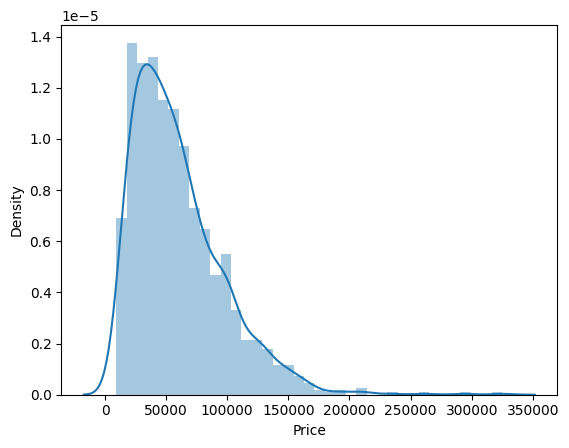

In [82]:
sns.distplot(laptop['Price'])
plt.show()

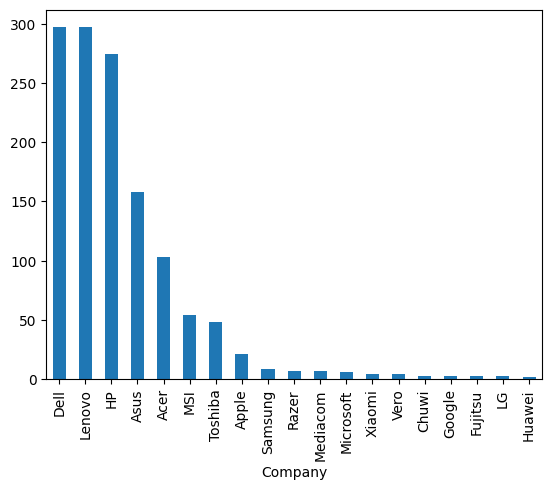

In [83]:
laptop['Company'].value_counts().plot(kind = 'bar')
plt.show()

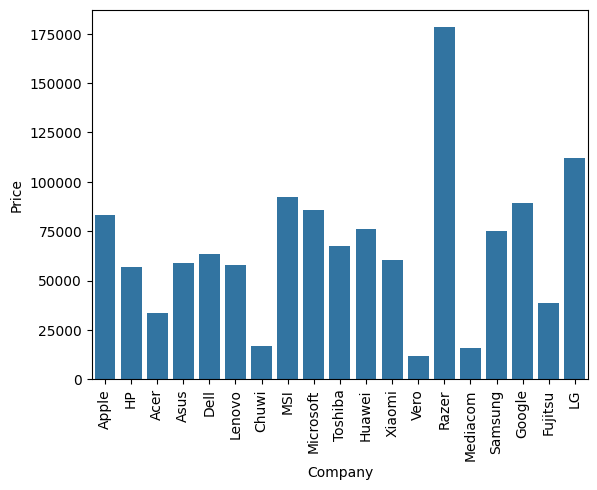

In [84]:
sns.barplot(x=laptop['Company'],y=laptop['Price'],errorbar=("ci",False))
plt.xticks(rotation='vertical')
plt.show()


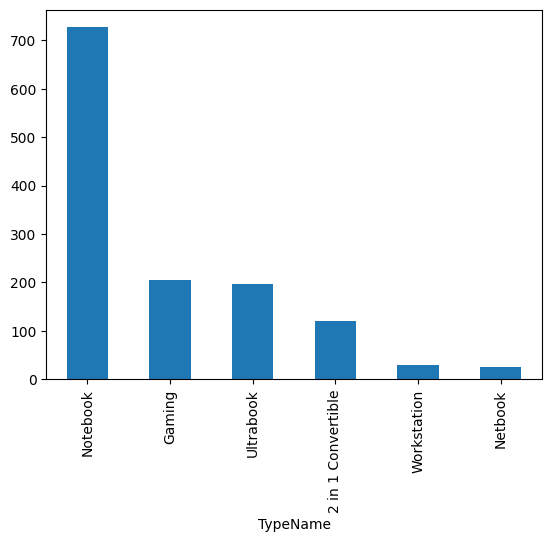

In [85]:
laptop['TypeName'].value_counts().plot(kind='bar')
plt.show()


According to the dataset people buy more notebook

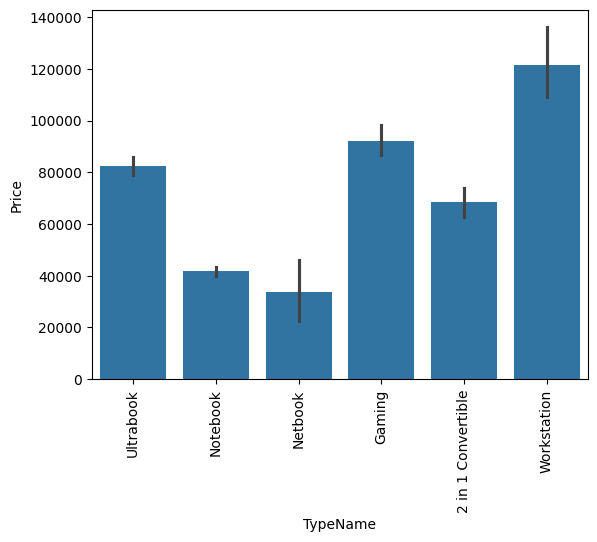

In [86]:
sns.barplot(x=laptop['TypeName'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()


Workstation is more costly compared to other laptops

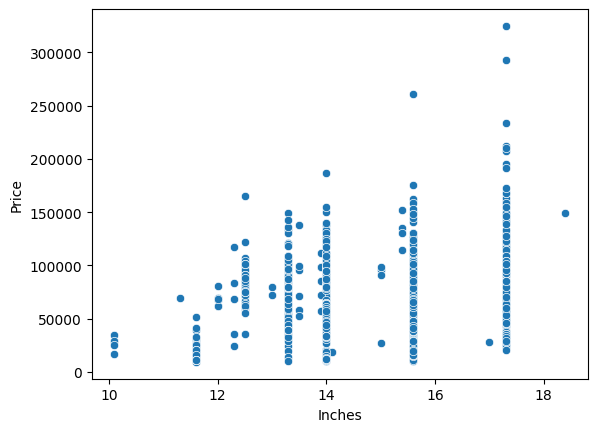

In [87]:
sns.scatterplot(x=laptop['Inches'],y=laptop['Price'])
plt.show()


Inches increases price also increases


**FEAUTURE ENGINEERING**

In [88]:
laptop['Ram']=laptop['Ram'].str.replace('GB','')
laptop['Weight']=laptop['Weight'].str.replace('kg','')
laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [89]:
features=laptop.drop(columns=['Price'])
target=laptop['Price']

In [90]:
features=features.join(pd.get_dummies(features['Company']))
features=features.drop(columns=['Company'])
features

,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,...,LG,Lenovo,MSI,Mediacom,Microsoft,Razer,Samsung,Toshiba,Vero,Xiaomi
0,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,...,False,False,False,False,False,False,False,False,False,False
1,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,...,False,False,False,False,False,False,False,False,False,False
2,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,...,False,False,False,False,False,False,False,False,False,False
3,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,...,False,False,False,False,False,False,False,False,False,False
4,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,...,False,True,False,False,False,False,False,False,False,False
1299,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,...,False,True,False,False,False,False,False,False,False,False
1300,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,...,False,True,False,False,False,False,False,False,False,False
1301,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
features=features.join(pd.get_dummies(features['TypeName']))
features=features.drop(columns=['TypeName'])
features

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,...,False,False,False,False,False,False,False,False,True,False
1,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,...,False,False,False,False,False,False,False,False,True,False
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,...,False,False,False,False,False,False,False,True,False,False
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,...,False,False,False,False,False,False,False,False,True,False
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,...,False,False,False,False,True,False,False,False,False,False
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,...,False,False,False,False,True,False,False,False,False,False
1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,...,False,False,False,False,False,False,False,True,False,False
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,...,False,False,False,False,False,False,False,True,False,False


In [92]:
features['Touchscreen']=features['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
features['IPS']=features['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
features

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS
0,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,...,False,False,False,False,False,False,True,False,0,1
1,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,...,False,False,False,False,False,False,True,False,0,0
2,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,...,False,False,False,False,False,True,False,False,0,0
3,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,...,False,False,False,False,False,False,True,False,0,1
4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,...,False,False,False,False,False,False,True,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,...,False,False,True,False,False,False,False,False,1,1
1299,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,...,False,False,True,False,False,False,False,False,1,1
1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,...,False,False,False,False,False,True,False,False,0,0
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,...,False,False,False,False,False,True,False,False,0,0


<Axes: xlabel='Touchscreen', ylabel='Price'>

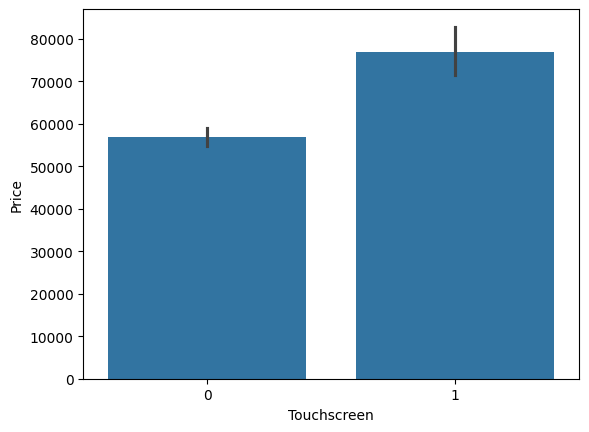

In [93]:
sns.barplot(x=features['Touchscreen'],y=target)

In [94]:
features["ScreenResolution"] = features['ScreenResolution'].str.split(" ").apply(lambda x: x[-1])
features["ScreenWidth"] =features['ScreenResolution'].str.split("x").apply(lambda x: x[0]).astype(int)
features["ScreenHeight"] =features['ScreenResolution'].str.split("x").apply(lambda x: x[1]).astype(int)
features

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,ScreenWidth,ScreenHeight
0,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,...,False,False,False,False,True,False,0,1,2560,1600
1,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,...,False,False,False,False,True,False,0,0,1440,900
2,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,...,False,False,False,True,False,False,0,0,1920,1080
3,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,...,False,False,False,False,True,False,0,1,2880,1800
4,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,...,False,False,False,False,True,False,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,...,True,False,False,False,False,False,1,1,1920,1080
1299,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,...,True,False,False,False,False,False,1,1,3200,1800
1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,...,False,False,False,True,False,False,0,0,1366,768
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,...,False,False,False,True,False,False,0,0,1366,768


In [95]:
features['Ppi']=(((features['ScreenHeight']**2)+(features['ScreenWidth']**2))**0.5/features['Inches']).astype(float)
features

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,ScreenWidth,ScreenHeight,Ppi
0,13.3,2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,...,False,False,False,True,False,0,1,2560,1600,226.983005
1,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,...,False,False,False,True,False,0,0,1440,900,127.677940
2,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,...,False,False,True,False,False,0,0,1920,1080,141.211998
3,15.4,2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,...,False,False,False,True,False,0,1,2880,1800,220.534624
4,13.3,2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,...,False,False,False,True,False,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,...,False,False,False,False,False,1,1,1920,1080,157.350512
1299,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,...,False,False,False,False,False,1,1,3200,1800,276.053530
1300,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,...,False,False,True,False,False,0,0,1366,768,111.935204
1301,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,...,False,False,True,False,False,0,0,1366,768,100.454670


In [96]:
features.drop(['ScreenResolution', 'ScreenWidth', 'ScreenHeight'], axis=1, inplace=True)
features

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,...,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,Ppi
0,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,...,False,False,False,False,False,True,False,0,1,226.983005
1,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,...,False,False,False,False,False,True,False,0,0,127.677940
2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,...,False,False,False,False,True,False,False,0,0,141.211998
3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,...,False,False,False,False,False,True,False,0,1,220.534624
4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,...,False,False,False,False,False,True,False,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,...,False,True,False,False,False,False,False,1,1,157.350512
1299,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,...,False,True,False,False,False,False,False,1,1,276.053530
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,...,False,False,False,False,True,False,False,0,0,111.935204
1301,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,...,False,False,False,False,True,False,False,0,0,100.454670


In [97]:
features['CPUName']=features['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
features

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,...,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,Ppi,CPUName
0,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,...,False,False,False,False,True,False,0,1,226.983005,Intel Core i5
1,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,...,False,False,False,False,True,False,0,0,127.677940,Intel Core i5
2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,...,False,False,False,True,False,False,0,0,141.211998,Intel Core i5
3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,...,False,False,False,False,True,False,0,1,220.534624,Intel Core i7
4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,...,False,False,False,False,True,False,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,...,True,False,False,False,False,False,1,1,157.350512,Intel Core i7
1299,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,...,True,False,False,False,False,False,1,1,276.053530,Intel Core i7
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,...,False,False,False,True,False,False,0,0,111.935204,Intel Celeron Dual
1301,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,...,False,False,False,True,False,False,0,0,100.454670,Intel Core i7


In [98]:
def fetch_processor(val):
  if val=='Intel Core i5' or val=='Intel Core i7' or val=='Intel Core i3':
    return val
  elif val.split()[0]=='Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'

In [99]:
features['CPUBrand']=features['CPUName'].apply(fetch_processor)
features

,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,Ppi,CPUName,CPUBrand
0,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,...,False,False,False,True,False,0,1,226.983005,Intel Core i5,Intel Core i5
1,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,...,False,False,False,True,False,0,0,127.677940,Intel Core i5,Intel Core i5
2,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,...,False,False,True,False,False,0,0,141.211998,Intel Core i5,Intel Core i5
3,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,...,False,False,False,True,False,0,1,220.534624,Intel Core i7,Intel Core i7
4,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,...,False,False,False,True,False,0,1,226.983005,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,...,False,False,False,False,False,1,1,157.350512,Intel Core i7,Intel Core i7
1299,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,...,False,False,False,False,False,1,1,276.053530,Intel Core i7,Intel Core i7
1300,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,...,False,False,True,False,False,0,0,111.935204,Intel Celeron Dual,Other Intel Processor
1301,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,...,False,False,True,False,False,0,0,100.454670,Intel Core i7,Intel Core i7


In [100]:
features['CPUBrand'].value_counts()

CPUBrand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

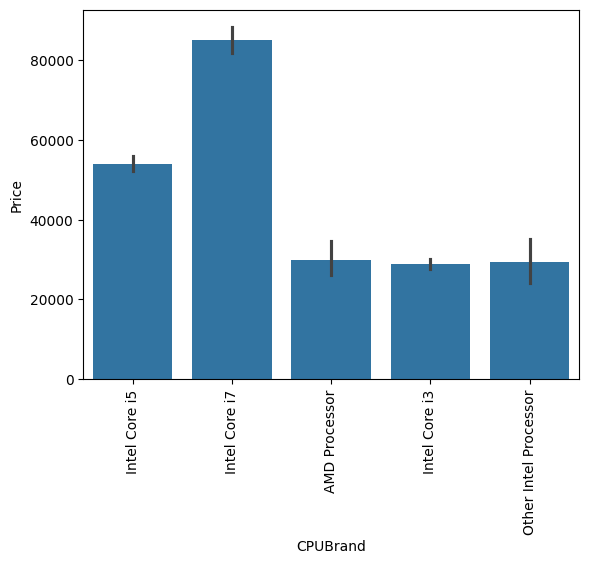

In [101]:
sns.barplot(x=features['CPUBrand'],y=target)
plt.xticks(rotation=90)

In [102]:
features['CPUFrequency']=features['Cpu'].str.split().apply(lambda x:x[-1])


In [103]:
features=features.drop(columns=['Cpu','CPUName'])
features

,Inches,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,Chuwi,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,Ppi,CPUBrand,CPUFrequency
0,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,False,...,False,False,False,True,False,0,1,226.983005,Intel Core i5,2.3GHz
1,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,False,...,False,False,False,True,False,0,0,127.677940,Intel Core i5,1.8GHz
2,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,False,...,False,False,True,False,False,0,0,141.211998,Intel Core i5,2.5GHz
3,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,False,...,False,False,False,True,False,0,1,220.534624,Intel Core i7,2.7GHz
4,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,False,...,False,False,False,True,False,0,1,226.983005,Intel Core i5,3.1GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,False,...,False,False,False,False,False,1,1,157.350512,Intel Core i7,2.5GHz
1299,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,False,...,False,False,False,False,False,1,1,276.053530,Intel Core i7,2.5GHz
1300,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,False,...,False,False,True,False,False,0,0,111.935204,Other Intel Processor,1.6GHz
1301,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,False,...,False,False,True,False,False,0,0,100.454670,Intel Core i7,2.5GHz


In [104]:
features['CPUFrequency']=features['CPUFrequency'].str[:-3]
features

,Inches,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,Chuwi,...,Gaming,Netbook,Notebook,Ultrabook,Workstation,Touchscreen,IPS,Ppi,CPUBrand,CPUFrequency
0,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,False,...,False,False,False,True,False,0,1,226.983005,Intel Core i5,2.3
1,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,False,...,False,False,False,True,False,0,0,127.677940,Intel Core i5,1.8
2,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,False,...,False,False,True,False,False,0,0,141.211998,Intel Core i5,2.5
3,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,False,...,False,False,False,True,False,0,1,220.534624,Intel Core i7,2.7
4,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,False,...,False,False,False,True,False,0,1,226.983005,Intel Core i5,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,False,...,False,False,False,False,False,1,1,157.350512,Intel Core i7,2.5
1299,13.3,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,False,...,False,False,False,False,False,1,1,276.053530,Intel Core i7,2.5
1300,14.0,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,False,...,False,False,True,False,False,0,0,111.935204,Other Intel Processor,1.6
1301,15.6,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,False,...,False,False,True,False,False,0,0,100.454670,Intel Core i7,2.5


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '8'),
  Text(1, 0, '16'),
  Text(2, 0, '4'),
  Text(3, 0, '2'),
  Text(4, 0, '12'),
  Text(5, 0, '6'),
  Text(6, 0, '32'),
  Text(7, 0, '24'),
  Text(8, 0, '64')])

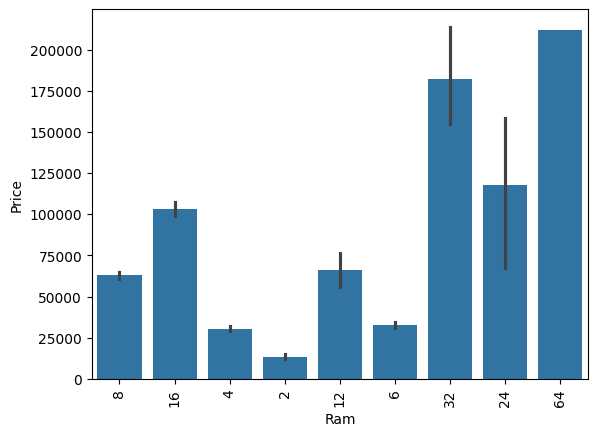

In [105]:
sns.barplot(x=features['Ram'],y=target)
plt.xticks(rotation=90)

In [106]:
features['Ram']=features['Ram'].astype(int)

features['CPUFrequency']=features['CPUFrequency'].astype(float)


In [107]:
features['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [108]:
features['Memory']=features['Memory'].str.replace('\.0', '', regex=True)
features['Memory']=features['Memory'].str.replace('GB','')
features['Memory']=features['Memory'].str.replace('TB','000')
new=features["Memory"].str.split("+", n = 1, expand = True)

features['First_Memory']=new[0]
features['Second_Memory']=new[1]
features["Second_Memory"].fillna("0", inplace = True)

features["FirstHDD"] = features["First_Memory"].apply(lambda x: 1 if "HDD" in x else 0)
features["FirstSSD"] = features["First_Memory"].apply(lambda x: 1 if "SSD" in x else 0)
features["FirstHybrid"] = features["First_Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
features["FirstFlash_Storage"] = features["First_Memory"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [109]:
features['First_Memory'] = features['First_Memory'].astype(str).str.findall(r'\d+').apply(lambda x: x[0])
features

,Inches,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,Chuwi,...,IPS,Ppi,CPUBrand,CPUFrequency,First_Memory,Second_Memory,FirstHDD,FirstSSD,FirstHybrid,FirstFlash_Storage
0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,False,...,1,226.983005,Intel Core i5,2.3,128,0,0,1,0,0
1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,False,...,0,127.677940,Intel Core i5,1.8,128,0,0,0,0,1
2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,False,...,0,141.211998,Intel Core i5,2.5,256,0,0,1,0,0
3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,False,...,1,220.534624,Intel Core i7,2.7,512,0,0,1,0,0
4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,False,...,1,226.983005,Intel Core i5,3.1,256,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,False,...,1,157.350512,Intel Core i7,2.5,128,0,0,1,0,0
1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,False,...,1,276.053530,Intel Core i7,2.5,512,0,0,1,0,0
1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,False,...,0,111.935204,Other Intel Processor,1.6,64,0,0,0,0,1
1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,False,...,0,100.454670,Intel Core i7,2.5,1000,0,1,0,0,0


In [110]:
features["SecondHDD"] = features["Second_Memory"].apply(lambda x: 1 if "HDD" in x else 0)
features["SecondSSD"] = features["Second_Memory"].apply(lambda x: 1 if "SSD" in x else 0)
features["SecondHybrid"] = features["Second_Memory"].apply(lambda x: 1 if "Hybrid" in x else 0)
features["SecondFlash_Storage"] = features["Second_Memory"].apply(lambda x: 1 if "Flash Storage" in x else 0)
features['Second_Memory'] = features['Second_Memory'].str.findall(r'\d+').apply(lambda x:x[0])
features

,Inches,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,Chuwi,...,First_Memory,Second_Memory,FirstHDD,FirstSSD,FirstHybrid,FirstFlash_Storage,SecondHDD,SecondSSD,SecondHybrid,SecondFlash_Storage
0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,False,...,128,0,0,1,0,0,0,0,0,0
1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,False,...,128,0,0,0,0,1,0,0,0,0
2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,False,...,256,0,0,1,0,0,0,0,0,0
3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,False,...,512,0,0,1,0,0,0,0,0,0
4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,False,...,256,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,False,...,128,0,0,1,0,0,0,0,0,0
1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,False,...,512,0,0,1,0,0,0,0,0,0
1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,False,...,64,0,0,0,0,1,0,0,0,0
1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,False,...,1000,0,1,0,0,0,0,0,0,0


In [111]:
features['First_Memory']=features['First_Memory'].astype(int)
features['Second_Memory']=features['Second_Memory'].astype(int)

features['HDD']=(features['First_Memory']*features['FirstHDD']+features['Second_Memory']*features['SecondHDD'])
features['SSD']=(features['First_Memory']*features['FirstSSD']+features['Second_Memory']*features['SecondSSD'])
features['Flash_Storage']=(features['First_Memory']*features['FirstFlash_Storage']+features['Second_Memory']*features['SecondFlash_Storage'])
features['Hybrid']=(features['First_Memory']*features['FirstHybrid']+features['Second_Memory']*features['SecondHybrid'])


In [112]:
features['FirstFlash_Storage'].value_counts()

FirstFlash_Storage
0    1228
1      75
Name: count, dtype: int64

In [113]:
features['Flash_Storage'].value_counts()

Flash_Storage
0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: count, dtype: int64

In [114]:
features=features.drop(columns=['First_Memory','Second_Memory','FirstHDD','FirstSSD','FirstHybrid','FirstFlash_Storage','SecondHDD','SecondSSD','SecondHybrid','SecondFlash_Storage'])
features

,Inches,Ram,Memory,Gpu,OpSys,Weight,Acer,Apple,Asus,Chuwi,...,Workstation,Touchscreen,IPS,Ppi,CPUBrand,CPUFrequency,HDD,SSD,Flash_Storage,Hybrid
0,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,False,True,False,False,...,False,0,1,226.983005,Intel Core i5,2.3,0,128,0,0
1,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,False,True,False,False,...,False,0,0,127.677940,Intel Core i5,1.8,0,0,128,0
2,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,False,False,False,False,...,False,0,0,141.211998,Intel Core i5,2.5,0,256,0,0
3,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,False,True,False,False,...,False,0,1,220.534624,Intel Core i7,2.7,0,512,0,0
4,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,False,True,False,False,...,False,0,1,226.983005,Intel Core i5,3.1,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.8,False,False,False,False,...,False,1,1,157.350512,Intel Core i7,2.5,0,128,0,0
1299,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.3,False,False,False,False,...,False,1,1,276.053530,Intel Core i7,2.5,0,512,0,0
1300,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.5,False,False,False,False,...,False,0,0,111.935204,Other Intel Processor,1.6,0,0,64,0
1301,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,False,False,False,False,...,False,0,0,100.454670,Intel Core i7,2.5,1000,0,0,0


In [115]:
features.drop('Memory',axis=1,inplace=True)

In [116]:
features['GPUBrand']=features['Gpu'].str.split(' ').apply(lambda x:x[0])
features.drop('Gpu',axis=1,inplace=True)

([0, 1, 2, 3],
 [Text(0, 0, 'Intel'),
  Text(1, 0, 'AMD'),
  Text(2, 0, 'Nvidia'),
  Text(3, 0, 'ARM')])

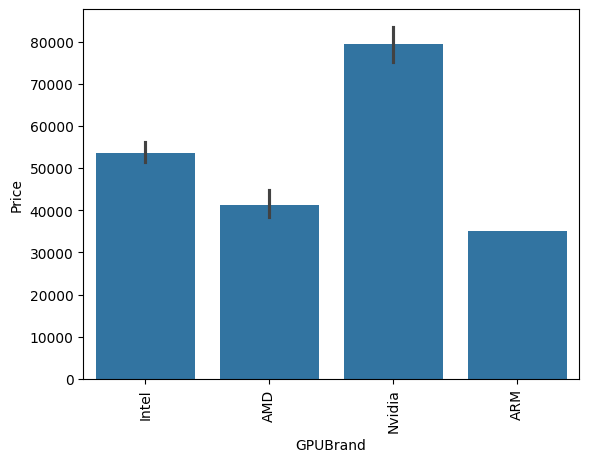

In [117]:
sns.barplot(x=features['GPUBrand'],y=target)
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

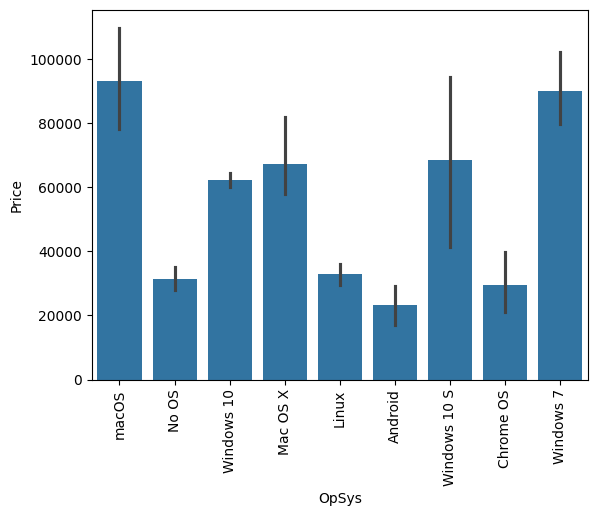

In [118]:
sns.barplot(x=features['OpSys'],y=target)
plt.xticks(rotation='vertical')

In [119]:
features=features.join(pd.get_dummies(features['OpSys']))
features.drop('OpSys',axis=1,inplace=True)
features

,Inches,Ram,Weight,Acer,Apple,Asus,Chuwi,Dell,Fujitsu,Google,...,GPUBrand,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,13.3,8,1.37,False,True,False,False,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
1,13.3,8,1.34,False,True,False,False,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
2,15.6,8,1.86,False,False,False,False,False,False,False,...,Intel,False,False,False,False,True,False,False,False,False
3,15.4,16,1.83,False,True,False,False,False,False,False,...,AMD,False,False,False,False,False,False,False,False,True
4,13.3,8,1.37,False,True,False,False,False,False,False,...,Intel,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.8,False,False,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1299,13.3,16,1.3,False,False,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1300,14.0,2,1.5,False,False,False,False,False,False,False,...,Intel,False,False,False,False,False,True,False,False,False
1301,15.6,6,2.19,False,False,False,False,False,False,False,...,AMD,False,False,False,False,False,True,False,False,False


<Axes: xlabel='Weight', ylabel='Price'>

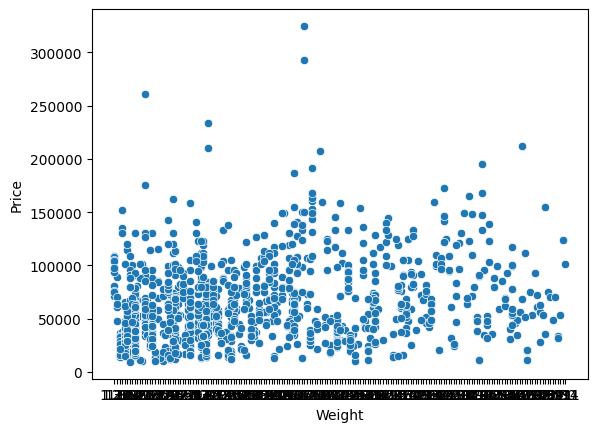

In [120]:
sns.scatterplot(x=laptop['Weight'],y=laptop['Price'])

In [121]:
cpu_brand=pd.get_dummies(features['CPUBrand'])
cpu_brand.columns=[col+'_CPU' for col in cpu_brand.columns]
features=features.join(cpu_brand)
features.drop('CPUBrand',axis=1,inplace=True)

In [122]:
gpu=pd.get_dummies(features['GPUBrand'])
gpu.columns=[col+'_GPU' for col in gpu.columns]
features=features.join(gpu)
features.drop('GPUBrand',axis=1,inplace=True)

In [123]:
features.dtypes

Inches                       float64
Ram                            int64
Weight                        object
Acer                            bool
Apple                           bool
Asus                            bool
Chuwi                           bool
Dell                            bool
Fujitsu                         bool
Google                          bool
HP                              bool
Huawei                          bool
LG                              bool
Lenovo                          bool
MSI                             bool
Mediacom                        bool
Microsoft                       bool
Razer                           bool
Samsung                         bool
Toshiba                         bool
Vero                            bool
Xiaomi                          bool
2 in 1 Convertible              bool
Gaming                          bool
Netbook                         bool
Notebook                        bool
Ultrabook                       bool
W

In [124]:
for col in features.columns:
    if features[col].dtype == 'bool':
        features[col] = features[col].astype(int)

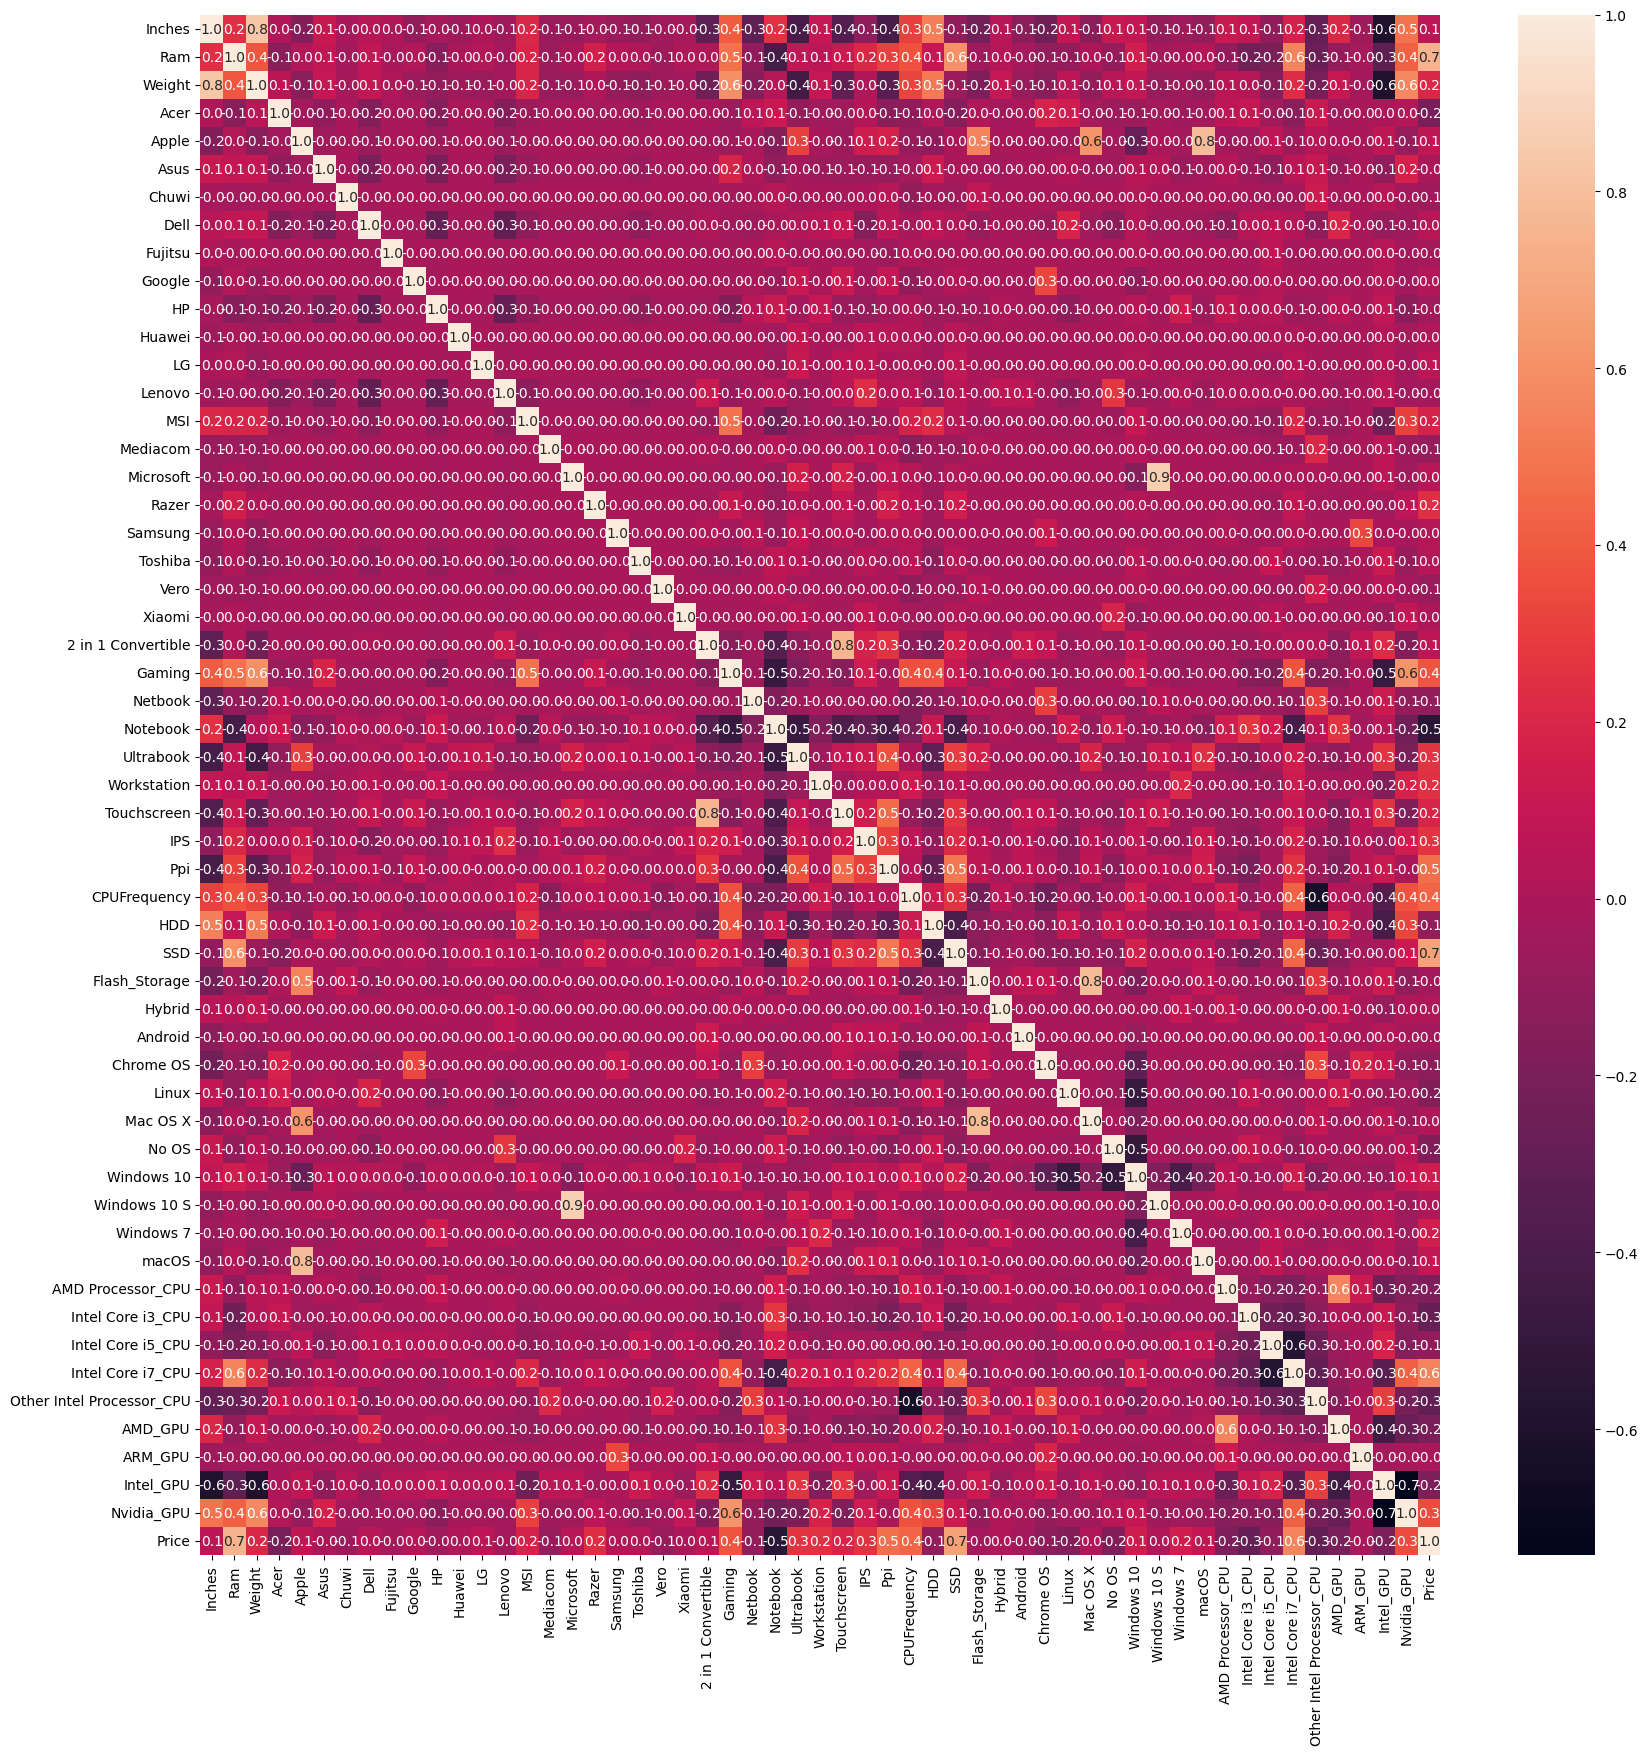

In [125]:
cor=pd.concat([features,target],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(cor.corr(),annot=True,fmt='.1f')
plt.show()

In [126]:
correltion=cor.corr()['Price'].apply(abs).sort_values()
correltion

Xiaomi                       0.000776
Hybrid                       0.007989
Asus                         0.010376
Mac OS X                     0.015656
Huawei                       0.016851
Windows 10 S                 0.018312
ARM_GPU                      0.018431
Fujitsu                      0.027135
Lenovo                       0.029007
Samsung                      0.034584
Google                       0.038086
Android                      0.038700
Toshiba                      0.040339
Flash_Storage                0.040511
HP                           0.041291
Microsoft                    0.047562
Dell                         0.048509
Chuwi                        0.055646
LG                           0.067053
Inches                       0.068197
Vero                         0.071972
2 in 1 Convertible           0.072675
Apple                        0.080688
Mediacom                     0.087161
macOS                        0.089928
HDD                          0.096441
Netbook     

In [127]:
mutual_info=mutual_info_regression(features,target)
mutual_info

array([2.34291809e-01, 5.31596723e-01, 3.13760227e-01, 5.67857525e-02,
       8.80359747e-04, 1.51682722e-02, 0.00000000e+00, 0.00000000e+00,
       1.52344861e-02, 0.00000000e+00, 2.08577128e-03, 4.54034784e-04,
       0.00000000e+00, 3.61695577e-03, 2.37175939e-02, 2.59814137e-03,
       0.00000000e+00, 6.01603738e-03, 7.01758118e-03, 4.96962347e-03,
       1.06344793e-02, 0.00000000e+00, 2.48435645e-02, 8.13375644e-02,
       1.29345856e-02, 2.27166002e-01, 7.51231599e-02, 3.56764928e-02,
       3.95797773e-02, 5.05948226e-02, 4.17935347e-01, 4.82825938e-01,
       8.64379010e-02, 3.70921275e-01, 9.69002546e-02, 8.09066640e-03,
       6.90832730e-03, 2.20585027e-02, 2.85036280e-02, 1.30235357e-02,
       1.74657504e-02, 5.25077345e-02, 0.00000000e+00, 3.31669640e-02,
       1.10039358e-02, 2.46546574e-02, 1.41083485e-01, 1.21007742e-01,
       2.35411028e-01, 1.68583519e-01, 4.19015826e-02, 0.00000000e+00,
       5.85457855e-02, 8.37484671e-02])

In [128]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=features.columns
mutual_info.sort_values(ascending=False)

Ram                          0.531597
CPUFrequency                 0.482826
Ppi                          0.417935
SSD                          0.370921
Weight                       0.313760
Intel Core i7_CPU            0.235411
Inches                       0.234292
Notebook                     0.227166
Other Intel Processor_CPU    0.168584
Intel Core i3_CPU            0.141083
Intel Core i5_CPU            0.121008
Flash_Storage                0.096900
HDD                          0.086438
Nvidia_GPU                   0.083748
Gaming                       0.081338
Ultrabook                    0.075123
Intel_GPU                    0.058546
Acer                         0.056786
Windows 10                   0.052508
IPS                          0.050595
AMD_GPU                      0.041902
Touchscreen                  0.039580
Workstation                  0.035676
Windows 7                    0.033167
Linux                        0.028504
2 in 1 Convertible           0.024844
AMD Processo

<Axes: >

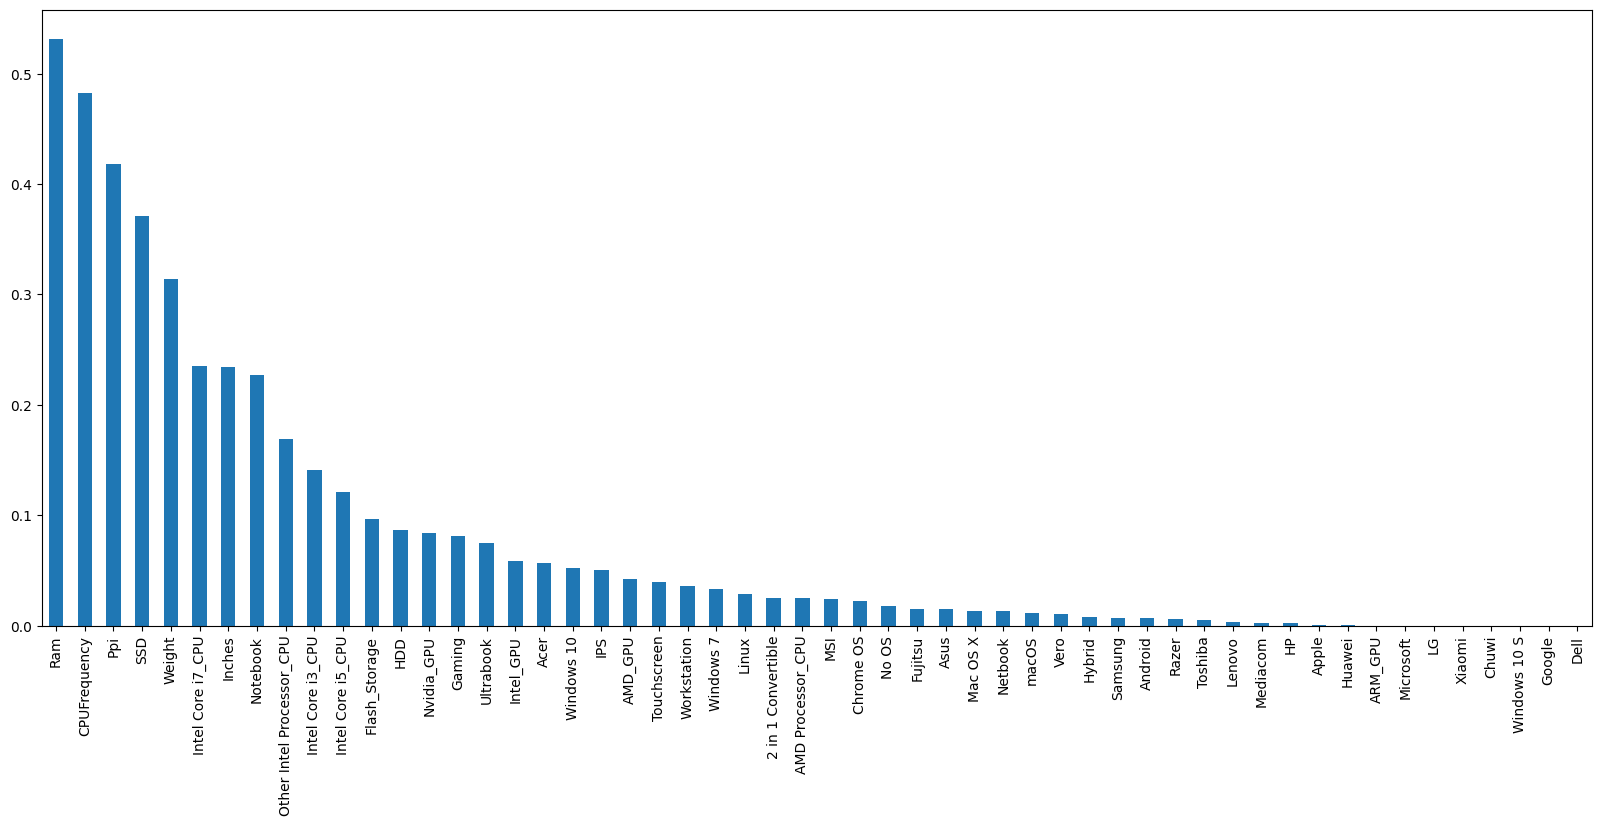

In [129]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [130]:
selected_features=mutual_info[mutual_info>0.01].index
selected_features.sort_values()

Index(['2 in 1 Convertible', 'AMD Processor_CPU', 'AMD_GPU', 'Acer', 'Asus',
       'CPUFrequency', 'Chrome OS', 'Flash_Storage', 'Fujitsu', 'Gaming',
       'HDD', 'IPS', 'Inches', 'Intel Core i3_CPU', 'Intel Core i5_CPU',
       'Intel Core i7_CPU', 'Intel_GPU', 'Linux', 'MSI', 'Mac OS X', 'Netbook',
       'No OS', 'Notebook', 'Nvidia_GPU', 'Other Intel Processor_CPU', 'Ppi',
       'Ram', 'SSD', 'Touchscreen', 'Ultrabook', 'Vero', 'Weight',
       'Windows 10', 'Windows 7', 'Workstation', 'macOS'],
      dtype='object')

In [131]:
selected_features=list(selected_features)


In [132]:
laptop_data=cor[selected_features]
laptop_data

,Inches,Ram,Weight,Acer,Asus,Fujitsu,MSI,Vero,2 in 1 Convertible,Gaming,...,Windows 7,macOS,AMD Processor_CPU,Intel Core i3_CPU,Intel Core i5_CPU,Intel Core i7_CPU,Other Intel Processor_CPU,AMD_GPU,Intel_GPU,Nvidia_GPU
0,13.3,8,1.37,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,13.3,8,1.34,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,15.6,8,1.86,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,15.4,16,1.83,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,13.3,8,1.37,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,14.0,4,1.8,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1299,13.3,16,1.3,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1300,14.0,2,1.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1301,15.6,6,2.19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


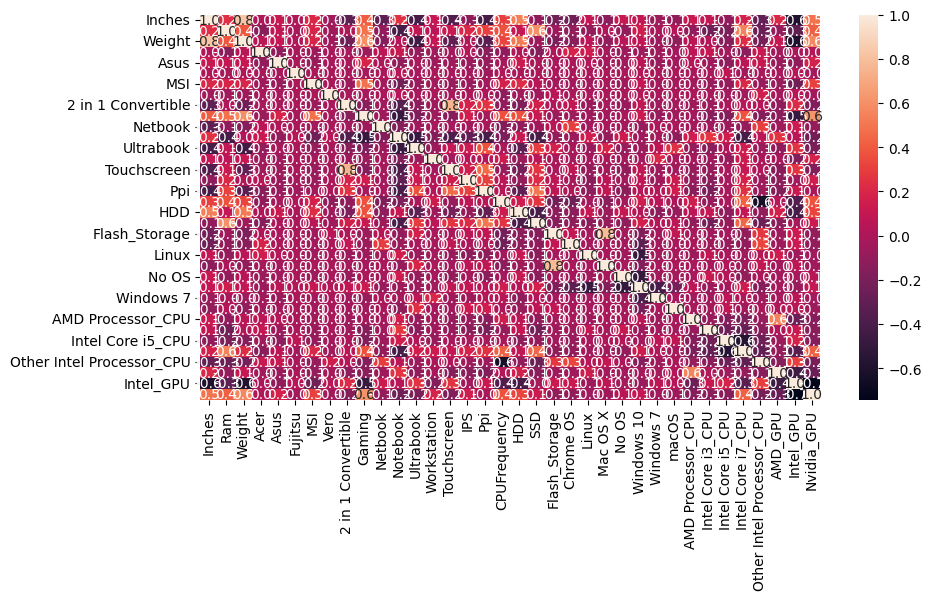

In [133]:
plt.figure(figsize=(10,5))
sns.heatmap(laptop_data.corr(),annot=True,fmt='.1f')
plt.show()

In [134]:
features=laptop_data
price=laptop['Price']

MODEL CREATION

**MODEL CREATION AND PIPELINE**

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,price,test_size=0.2,random_state=1)

In [136]:
models = [
    ('Linear Regression', LinearRegression()),
    ('DecisionTree',DecisionTreeRegressor() ),
    ('RandomForest',RandomForestRegressor())
]


for model_name, model in models:
    pipe = Pipeline([(model_name, model)])

    pipe.fit(x_train, y_train)
    predictions = pipe.predict(x_test)

    mape=mean_absolute_percentage_error(y_test,predictions)
    r2 = r2_score(y_test, predictions)
    mae=mean_absolute_error(y_test,predictions)

    print(f"--- {model_name} ---")
    print("mean_absolute_error",mae)
    print('Mean_absolute_percentage_error',mape)
    print("R2 score", r2)
    print()


--- Linear Regression ---
mean_absolute_error 11454.86626447982
Mean_absolute_percentage_error 0.2085251179239065
R2 score 0.8143908604482684

--- DecisionTree ---
mean_absolute_error 12992.880703448274
Mean_absolute_percentage_error 0.21204708460602764
R2 score 0.7410029492014292

--- RandomForest ---
mean_absolute_error 9255.792305891628
Mean_absolute_percentage_error 0.15084760805495595
R2 score 0.846512518265182



**HYPERPARAMETER TUNNING**

In [137]:
rf=RandomForestRegressor()
param={
    'n_estimators':[10,50,100,150],
    'bootstrap':[True,False],
    'random_state':[0,1,42,2,3]
}

In [138]:

gd=GridSearchCV(rf,param,cv=5,scoring='r2')
gd.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'n_estimators': [10, 50, 100, 150],
                         'random_state': [0, 1, 42, 2, 3]},
             scoring='r2')

In [139]:
print(gd.best_params_)

{'bootstrap': True, 'n_estimators': 150, 'random_state': 0}


In [140]:
model_rf=RandomForestRegressor(n_estimators=150,random_state=0,bootstrap=True)
model_rf.fit(x_train,y_train)
y_pred=model_rf.predict(x_test)

In [141]:
print("r2_score:",r2_score(y_test,y_pred))

r2_score: 0.8510623840044382


In [142]:
import joblib
joblib.dump(model_rf,'laptop_price_prediction')

['laptop_price_prediction']